<a href="https://www.kaggle.com/code/shubhammisar/waterqualityanalysis-classification-smote?scriptVersionId=138937864" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality/waterQuality1.csv


![Image Water](https://images.unsplash.com/photo-1515150144380-bca9f1650ed9?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MzJ8fHdhdGVyfGVufDB8fDB8fHww&auto=format&fit=crop&w=500&q=60)

### SMOTE Algorithm for Oversampling

SMOTE (Synthetic Minority Over-sampling Technique) addresses class imbalance by creating synthetic samples for the minority class:

1. **Select a Minority Instance**: Choose instances from the minority class.

2. **Generate Synthetic Samples**: Interpolate features with neighbors to create new samples.

3. **Introduce Randomness**: Add randomness to avoid exact replication.

4. **Benefits**: Improved model training, prevents overfitting.

5. **Considerations**: Tune parameters for best results.

6. **Alternatives**: ADASYN, Borderline-SMOTE for specific cases.


## Data Cleaning

In [2]:
df = pd.read_csv('/kaggle/input/water-quality/waterQuality1.csv')

In [3]:
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [4]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [7]:
df = df[df['is_safe'].isin(['0','1'])]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [9]:
df.loc[:,'is_safe'] = df.loc[:,'is_safe'].astype(int)

/tmp/ipykernel_20/289429159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'is_safe'] = df.loc[:,'is_safe'].astype(int)
/tmp/ipykernel_20/289429159.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'is_safe'] = df.loc[:,'is_safe'].astype(int)


In [10]:
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce', downcast='float')

/tmp/ipykernel_20/4169925611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce', downcast='float')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float32
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

## Exploratory Data Analysis

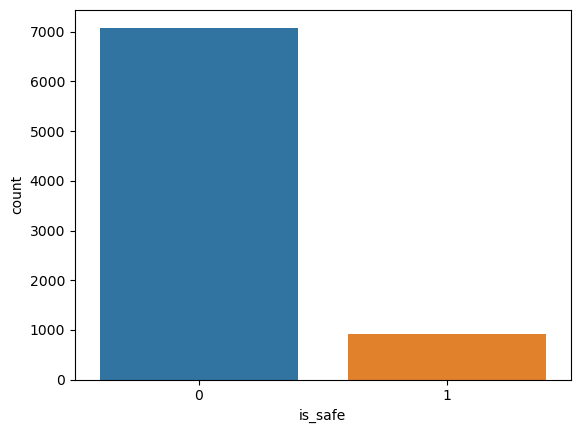

In [12]:
sns.countplot(data = df, x = 'is_safe')
plt.show()

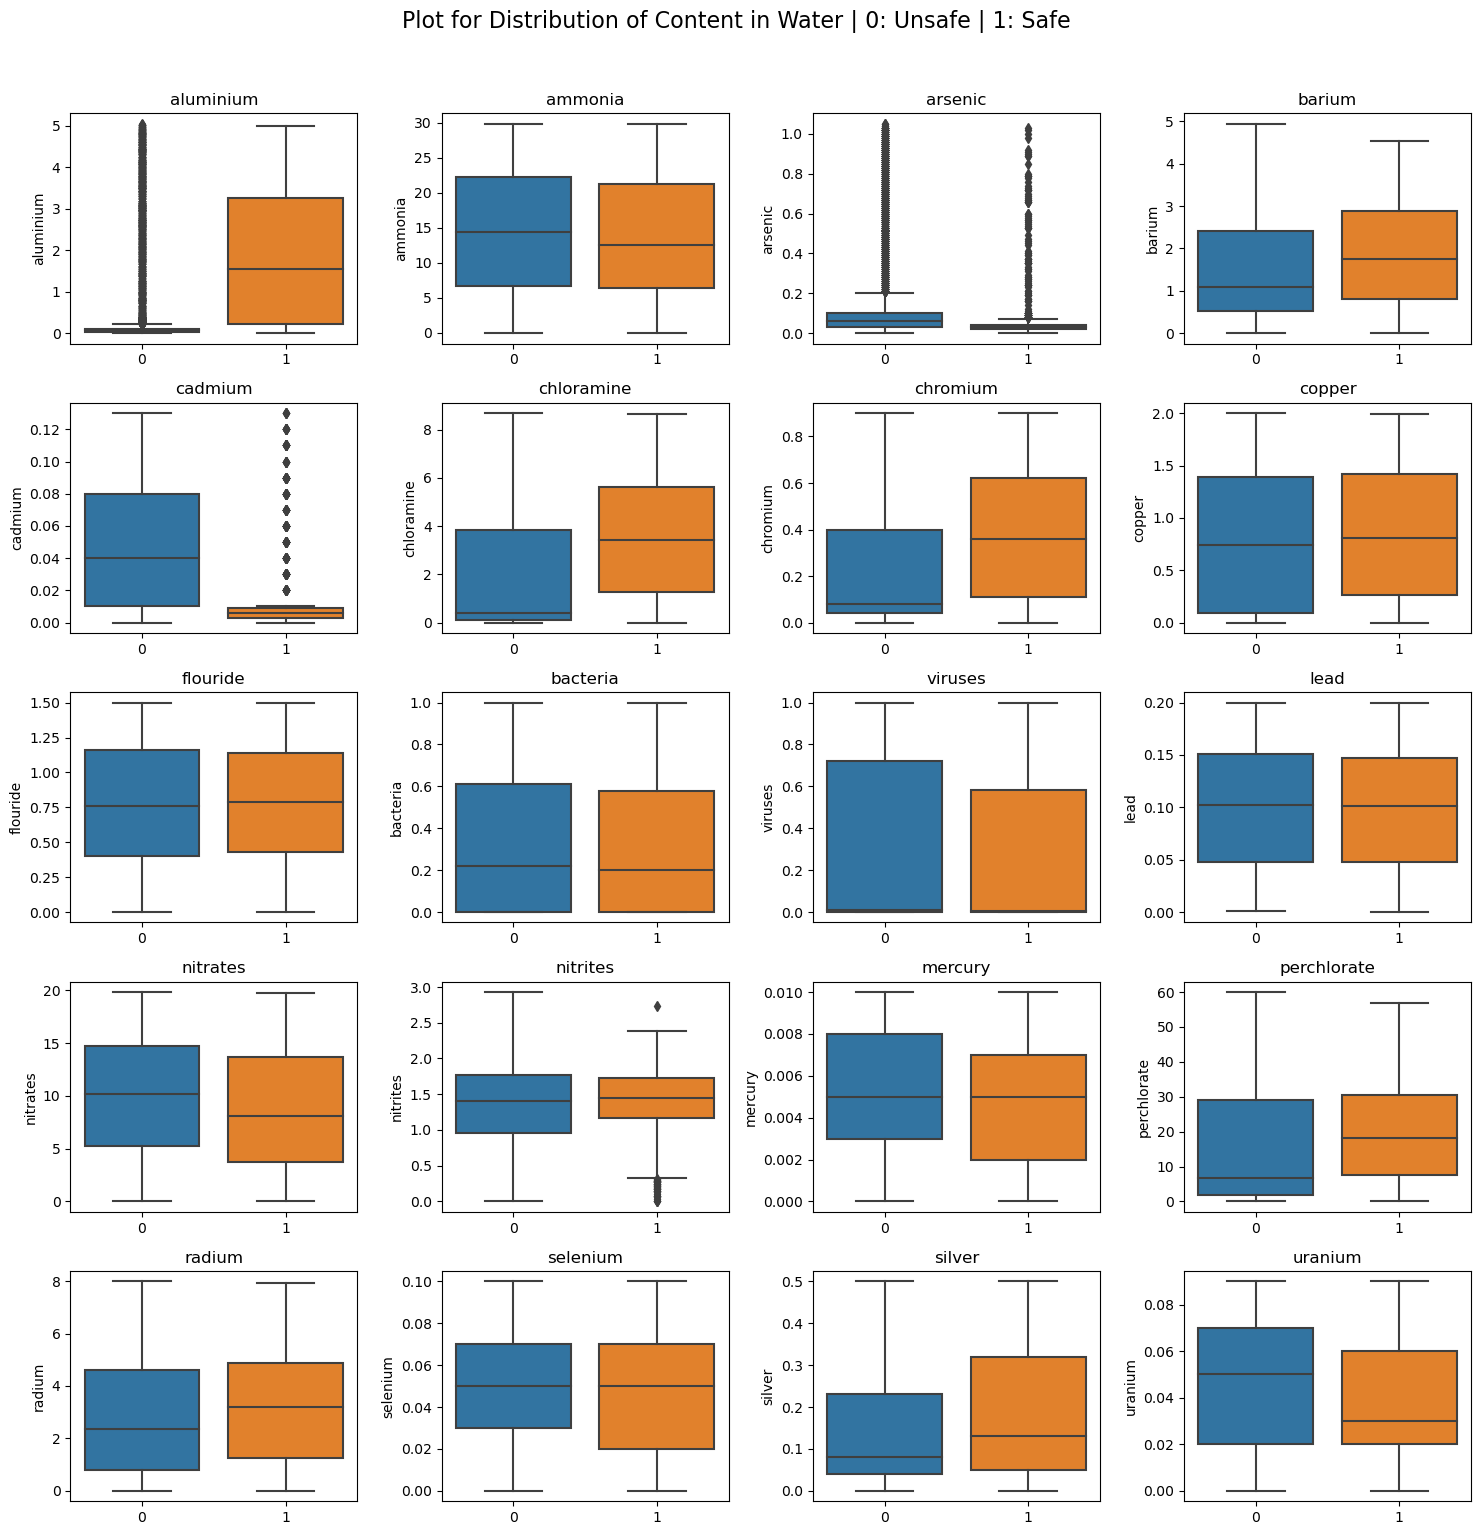

In [13]:
columns_to_plot = df.columns.tolist()
columns_to_plot.remove('is_safe')

num_rows = 5
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

for i, col in enumerate(columns_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(data=df, x='is_safe', y=col, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_xlabel('')

    #axes[row_index, col_index].set_ylabel(col)
    
plt.suptitle("Plot for Distribution of Content in Water | 0: Unsafe | 1: Safe", y=1.02, fontsize=16)


plt.tight_layout()
plt.show()

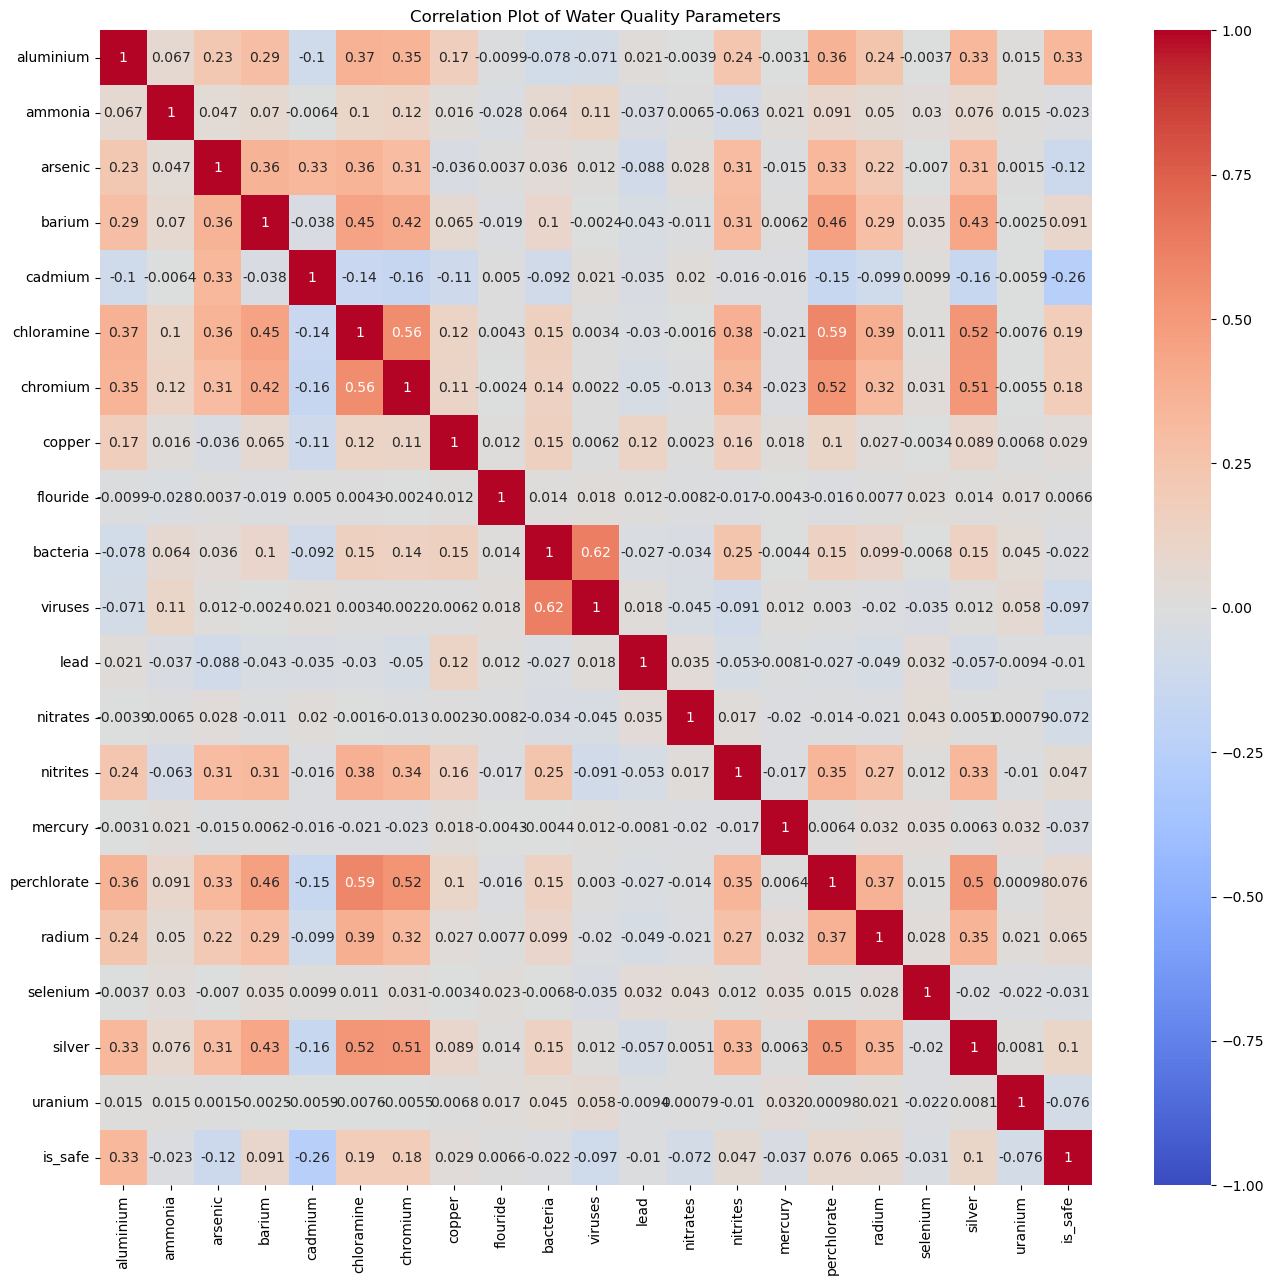

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Plot of Water Quality Parameters")
plt.show()

we see somewhat correlation between bacteria with virus and chromium with chloramine

## Feature Engineering

In [15]:
X = df.drop('is_safe', axis = 1)
y = df['is_safe']

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Let's resample the minority class using SMOTE

In [17]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=42)

In [18]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

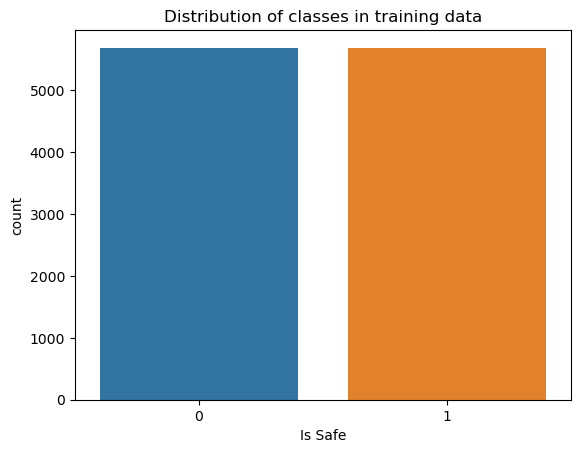

In [19]:
sns.countplot(x = y_resampled)
plt.title("Distribution of classes in training data")
plt.xlabel("Is Safe")
plt.show()

Let's see if the distribution is still the same for the features

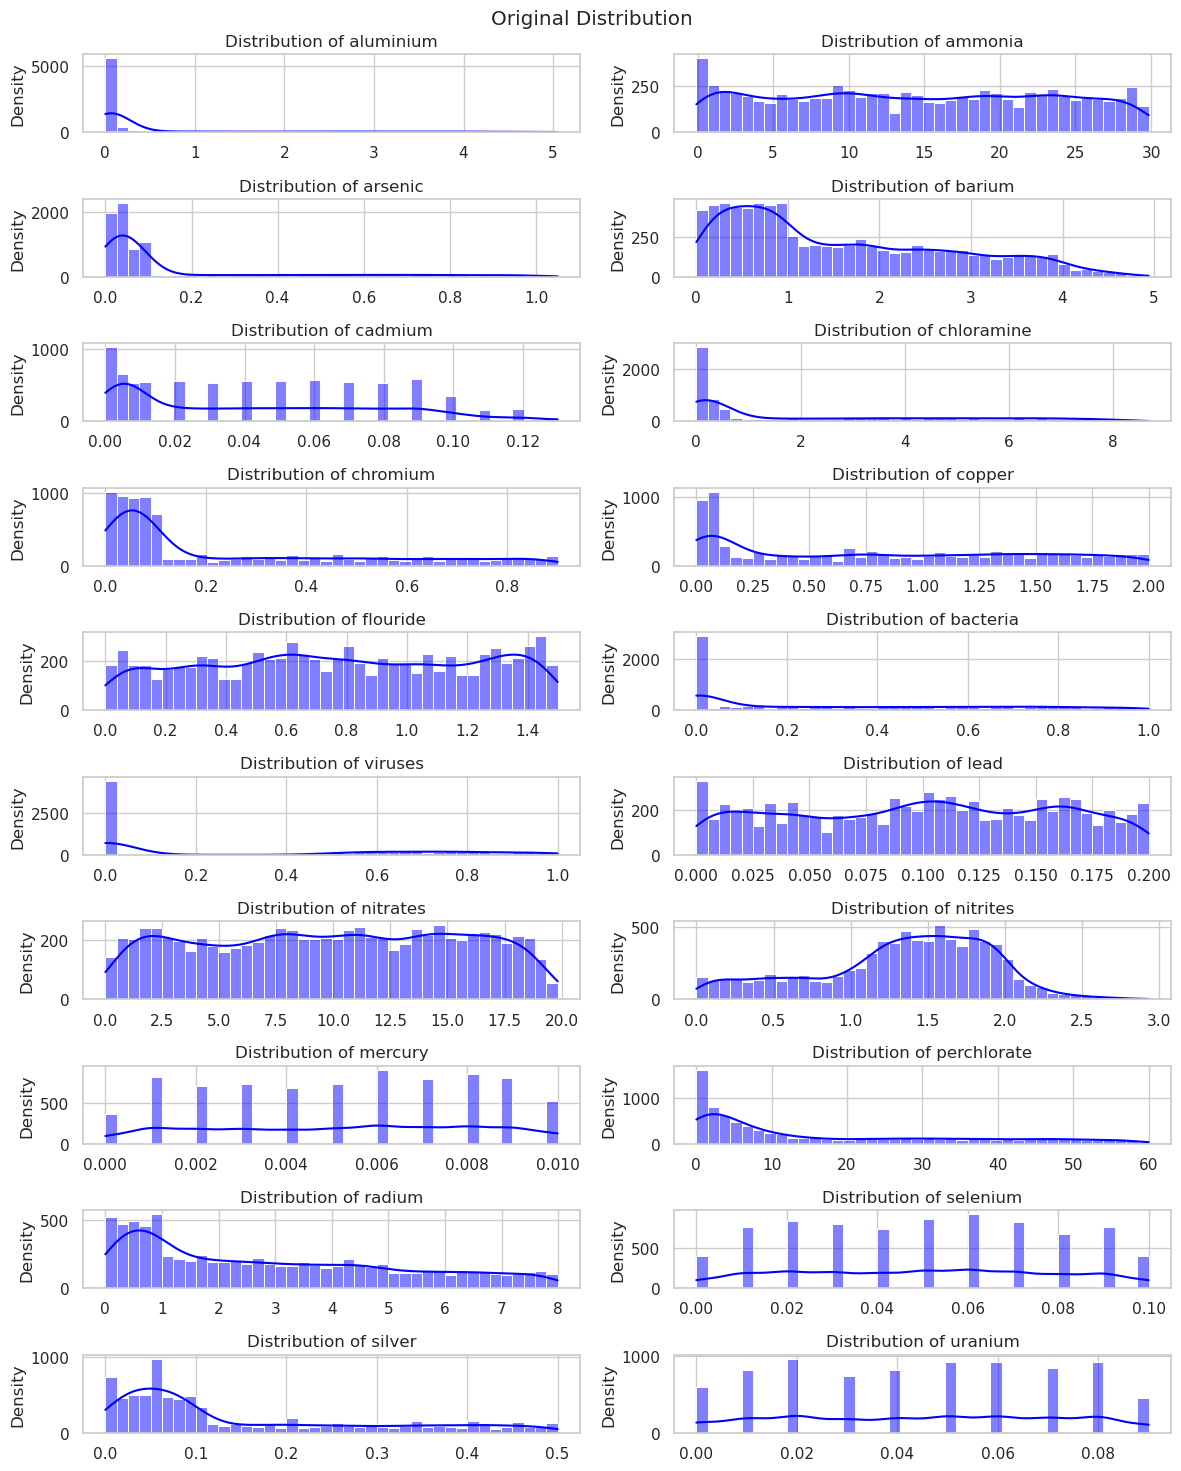

In [20]:
sns.set(style='whitegrid')

# Plot histograms for the distribution of all columns
plt.figure(figsize=(12, 15))
data_columns = df.columns.tolist()
data_columns.remove('is_safe')

# Adjust the number of rows and columns in the subplot grid for better visualization
num_rows = len(data_columns) // 2 + len(data_columns) % 2
num_cols = 2

for i, column in enumerate(data_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[column], kde=True, color='blue', bins=40)
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Density')

plt.suptitle("Original Distribution")
plt.tight_layout()
plt.show()

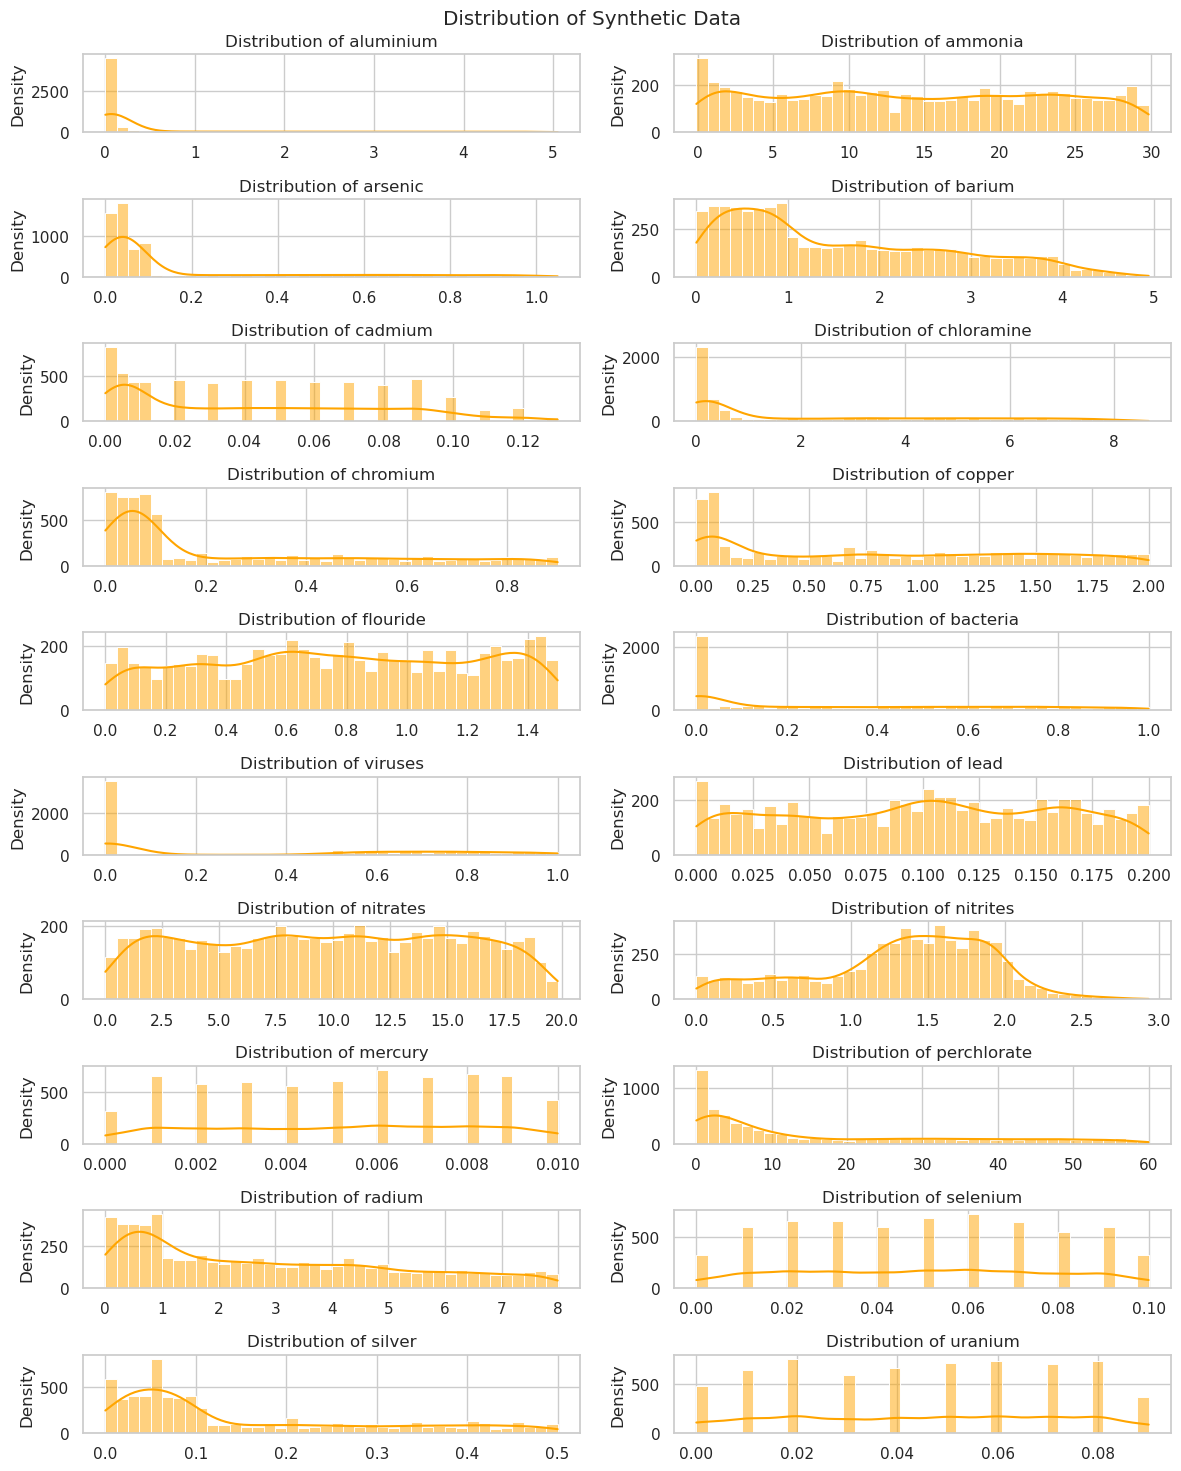

In [21]:
sns.set(style='whitegrid')

# Plot histograms for the distribution of all columns
plt.figure(figsize=(12, 15))
data_columns = X_train.columns.tolist()

# Adjust the number of rows and columns in the subplot grid for better visualization
num_rows = len(data_columns) // 2 + len(data_columns) % 2
num_cols = 2

for i, column in enumerate(data_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X_train[column], kde=True, color='orange', bins=40)
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Density')

plt.suptitle("Distribution of Synthetic Data")
plt.tight_layout()
plt.show()

## Training

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [23]:
classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC(kernel='rbf', gamma='auto')),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 10))
]


In [24]:
scoring = ['accuracy', 'precision', 'recall', 'f1']


In [25]:
avg_scores = {}

for name, classifier in classifiers:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('classifier', classifier)  
    ])    
    
    scores = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)

    avg_scores[name] = {metric: scores[metric].mean() for metric in scores}


In [26]:
for index, val in avg_scores.items():
    print(index)
    print("Accuracy: {0}".format(val['test_accuracy']))
    print("Precision: {0}".format(val['test_precision']))
    print("Recall: {0}".format(val['test_recall']))
    print("F1: {0}".format(val['test_f1']))
    print("\n")

Random Forest
Accuracy: 0.9529400410476935
Precision: 0.9205321700821061
Recall: 0.6320693391115927
F1: 0.7492471328420516


Logistic Regression
Accuracy: 0.9082239542611414
Precision: 0.6782645912248884
Recall: 0.334324830099478
F1: 0.44680146891004363


Support Vector Machine
Accuracy: 0.9387113956215793
Precision: 0.879592729941432
Recall: 0.5210873633408845
F1: 0.6542017686233592


K-Nearest Neighbors
Accuracy: 0.912289019741986
Precision: 0.8104824086903157
Recall: 0.28097114153452185
F1: 0.4148223164933958




Let's Take Random forest Classifier and tune its hyperparameters focusing on recall

In [27]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())  
])


param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],

}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best Score: 0.6629666108539348


In [28]:
best_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 2
}

# Create a pipeline with the best parameters
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(**best_params))
])

In [29]:
from sklearn.metrics import classification_report

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1400
           1       0.97      0.72      0.83       200

    accuracy                           0.96      1600
   macro avg       0.96      0.86      0.90      1600
weighted avg       0.96      0.96      0.96      1600



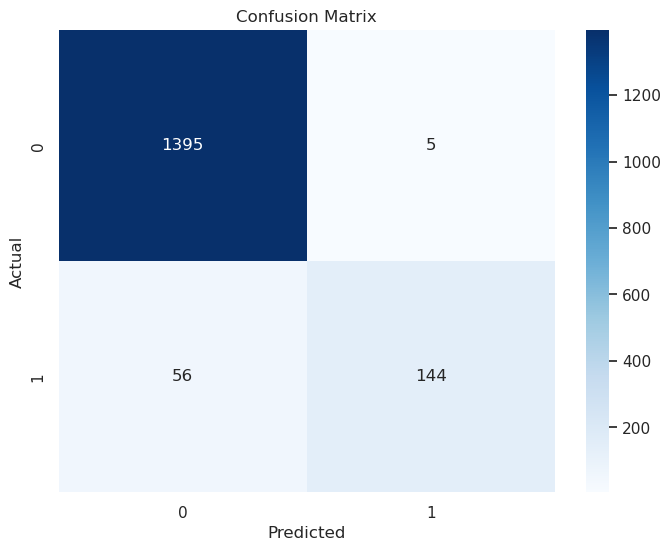

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()